In [18]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 
import sys

[ 0.33833333  1.37166667  2.40625     3.44083333  4.47791667  5.51541667
  6.55833333  7.14041667  8.17166667  9.20125    10.23       11.25541667
 12.2825     13.30708333 14.3325     15.35708333 16.38208333 17.40625
 18.43125    19.45625    20.48458333 21.5175     22.09875    23.12375
 24.15083333 25.1825     26.21875    27.25625    28.295      29.33208333
 30.36791667 31.40291667 32.4375     33.47166667 34.50708333 35.06375
 36.0925     37.12083333 38.15208333 39.18666667 40.22291667]


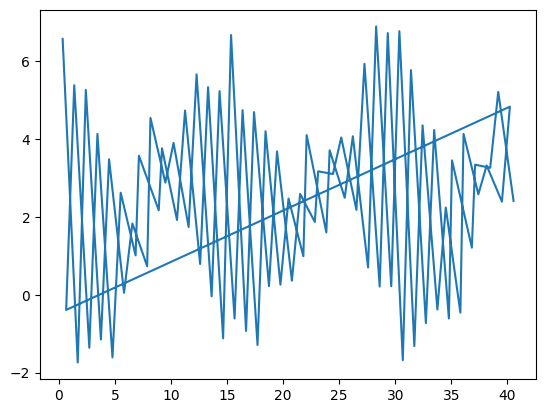

In [29]:
data = np.loadtxt("ASTR19_S22_group_project_data.txt")
x = np.zeros(41)
y= np.zeros(41)
a = 0
x1 = np.zeros(41)
y1 = np.zeros(41)
i = 0
while(i<82):
    if(i==0 or i ==1):
       x[a] = (data[i,1]/24.0)
    else:
       x[a] = (data[i,1]/24.0)+(1*a)
    y[a] = data[i,2]
    i+=2
    a+=1
a=0
i = 0
while(i<82):
    i+=1
    if(i==0 or i ==1):
       x1[a] = (data[i,1]/24.0)
    else:
       x1[a] = (data[i,1]/24.0)+(1*a)
    y1[a]=data[i,2]
    i+=1
    a+=1
x2 = np.zeros(82)
y2 = np.zeros(82)
a = 0
for i in range(82):
    if(i%2 == 0):
        if(i>=41):
            x2[i] = x[i-41]
            y2[i] = y[i-41]
        else:
            x2[i] = x[i]
            y2[i] = y[i]
    else:
        if(i>=41):
            x2[i] = x1[i-41]
            y2[i] = y1[i-41]
        else:
            x2[i] = x1[i]
            y2[i] = y1[i]
plt.plot(x2,y2,'-')

[-3.08959506  0.3757044   2.64748709]
-3.089595063646793
0.37570440133916505
2.6474870878216064


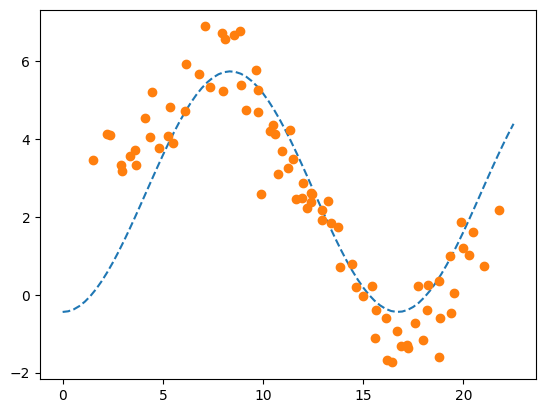

In [8]:
def cosine(x,A,B,c):
    y = A*np.cos(B*x)+c
    return y
guess = [-4.7,0.4,3.6]
p, c = curve_fit(cosine,x, y, p0=guess)
print(p)
p1 = p[0]
print(p1)
p2 = p[1]
print(p2)
p3 = p[2]
print(p3)
b = np.linspace(0,22.5,82)
fit = cosine(b, p1, p2,p3)
plt.plot(b, fit, '--', label='fit')
plt.plot(x,y,'o')
# yes i know this doesnt work

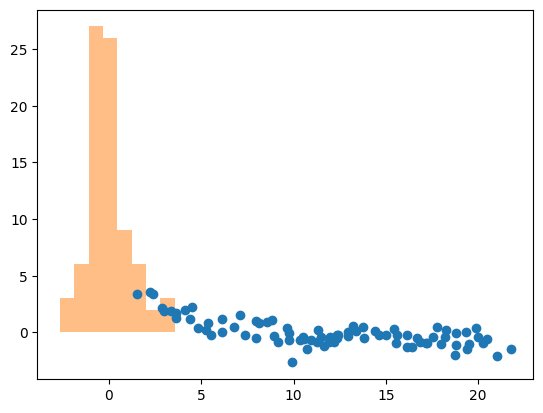

In [7]:
#alr look here's how it would go

dev = y - fit
plt.plot(x, dev, 'o')
plt.hist(dev, bins=8, alpha=0.5)
stand = np.std(dev)
